> 
# Project: Investigate a Dataset using Tmdb data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset consist of 10000+ records of movies.Through this data we can analyze the change in various sectors like revenue collected, runtime etc<br>
The questions raised are as follows:<br>
1.Highest budget movie<br>
2.Highest revenue collected.<br>
3.top 10 average runtime of genres.<br>
4.Analysis of average runtime of all movies every year.<br>
5.Analysis of average profit earned every year.<br>
6.Analysis of average number of movies released per month<br>
7.Analysis of average profit earned per month<br>


 

In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
get_ipython().run_line_magic('matplotlib', 'inline')



In [2]:

## Data Wrangling

#After going through the given data set, We need to remove the unnecessary items from the data set.
### General Properties

In [3]:
##loading the data set
import pandas as pd
df= pd.read_csv('tmdb-movies.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#removing the unnecessary column using drop function.
dp=df.drop(['id', 'imdb_id', 'popularity', 'original_title',
       'cast', 'homepage', 'tagline', 'keywords', 'overview',
        'production_companies',
    'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],1)
#checking for the required output-displaying.
dp.head()


,budget,revenue,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [6]:
#creating new column profit
dp['profit']=dp['revenue']-dp['budget']
dp.head()
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
budget          10866 non-null int64
revenue         10866 non-null int64
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
release_year    10866 non-null int64
profit          10866 non-null int64
dtypes: int64(5), object(3)
memory usage: 679.2+ KB


In [7]:
#convertinhg date and time
dp.release_date = pd.to_datetime(dp['release_date'])
dp.head()
dp.dtypes

budget                   int64
revenue                  int64
director                object
runtime                  int64
genres                  object
release_date    datetime64[ns]
release_year             int64
profit                   int64
dtype: object

In [8]:
#for checking the highest budget and highest revenue collected.
dp.describe()
#highest budget=4.250000e+08
#highest revenue =2.781506e+09


,budget,revenue,runtime,release_year,profit
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,1.086600e+04
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658,2.519762e+07
std,3.091321e+07,1.170035e+08,31.381405,12.812941,9.658799e+07
min,0.000000e+00,0.000000e+00,0.000000,1960.000000,-4.139124e+08
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000,9.083358e+06
max,4.250000e+08,2.781506e+09,900.000000,2015.000000,2.544506e+09


In this section .All the unnecessary columns has been removed .And the reason for removing them are as follows:
1.Director,overview,production companies Etc->Because I am mainly focusing on the profit earned and runtime related data.
2.Creating a new column:-Profit.
3.Converting the release date section into a proper datatype.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 top 10 average runtime of genres .

In [9]:
dp.groupby('genres')['runtime'].mean().nlargest(10)
# the average runtime of different group of genres.


genres
War|Drama|Action|Adventure|History         540.0
Adventure|Comedy|Family|Fantasy|Mystery    417.0
Adventure|Drama|Fantasy|Horror             366.0
Drama|History|Western                      343.0
Crime|Drama|Thriller|History               338.0
Drama|War|History                          324.5
Drama|Science Fiction|TV Movie             282.0
Drama|Horror|Thriller|TV Movie             273.0
Action|Fantasy|Mystery                     270.0
Drama|Western|Adventure                    250.0
Name: runtime, dtype: float64

### Research Question 2  Analysis of average profit earned every year


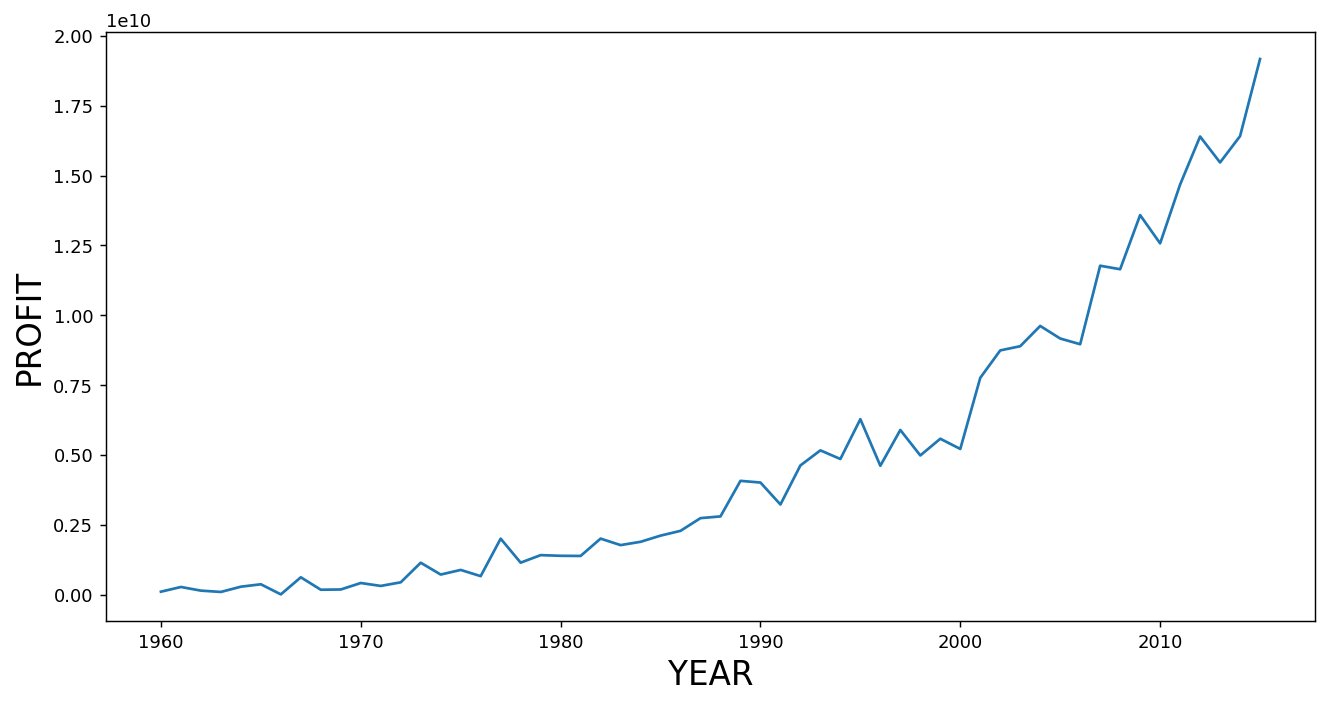

In [10]:
totalprofit_year = dp.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('YEAR', fontsize = 18)
plt.ylabel('PROFIT', fontsize = 18)
plt.plot(totalprofit_year)
plt.show()

### Increase in Profit with every year shows the amount of money spent on entertainment. And increase in engagement of people.
    ####growth in population can be one of the reason behind it.
    ####Some consecutive year have a up and down which can be happened due to the time taking in the entertainment.


In [11]:
###Analysis of average average runtime every year


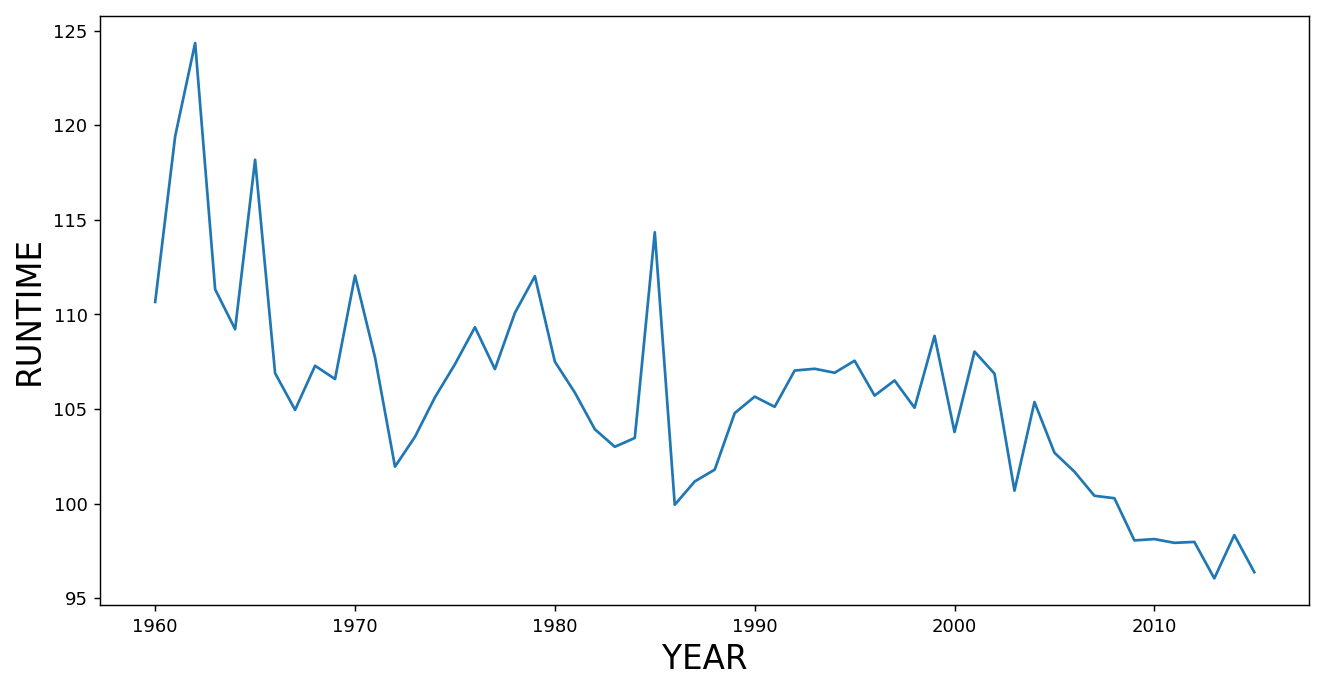

In [12]:
totalprofit_year = dp.groupby('release_year')['runtime'].mean()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('YEAR', fontsize = 18)
plt.ylabel('RUNTIME', fontsize = 18)
plt.plot(totalprofit_year)
plt.show()
##there is sudden increase and decrease in the average run time every year but the factors behind it cannot be observed through the 
##provided dataset. But, overall there is a decrease in runtime.

In [13]:
def seperating_genre(data):

    return data.str[0:].str.split('|',expand=True)
genres=seperating_genre(dp['genres'])


In [14]:
#seperating month from release_date column
dp['month'] = dp['release_date'].apply(lambda x: x.month)
dp.head()

,budget,revenue,director,runtime,genres,release_date,release_year,profit,month
0,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810,6
1,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354,5
2,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201,3
3,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225,12
4,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360,4


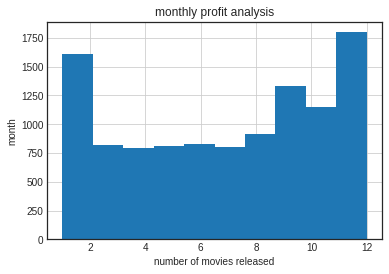

In [15]:
##Analysiing total number of movies released per month
totalmovie_month = dp['month']
plt.style.use('seaborn-white')
plt.title("monthly profit analysis")
plt.xlabel("number of movies released")
plt.ylabel("month")
totalmovie_month.hist()

In [17]:
##Average profit earned per month. 

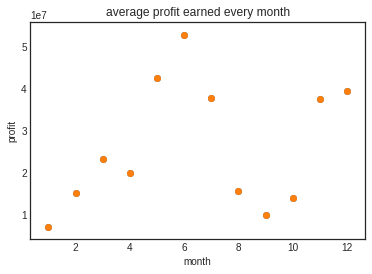

In [20]:
profit=dp.groupby('month')['profit'].mean()
months= [1,2,3, 4,5, 6,7, 8,9,10,11,12]

plt.scatter(months,profit)
plt.title("average profit earned every month")
plt.xlabel("month")
plt.ylabel("profit")
plt.scatter(months,profit)
plt.show()
#this shows that the most suitable time for launching a movie is either june[6] or december[12]

In [ ]:
ax1 = totalprofit_month.plot.scatter(x='',y='width', c='DarkBlue')

<a id='conclusions'></a>
## Conclusions

> My investigation mainly focused on the runtime , genres and profit .<br>
Profit:-<br>
There is always a positive response in profit every year .<br>
Runtime:-<br>
There is a sudden downfall in runtime of movies in between 1960s-1980s.But overall the runtime of movies are decreasing every year.<br>
Genre:-<br>
A particular attention on average runtime on a particular set of genre has been observed and studied.<br>
LIMITATIONS:-<br>
1.Analysis of number of movies released per-month in every year has not been found .<br>
2.Profit rate of particular section of genre like Comedy,Drama has not been done.<br>
3.The most evergreen genre which has a success rate throughout the journey has not been studied.<br>
4. One strange thing i have noticed is that , although the average number of movies released on june is lesser but the profit earned is maximum on that month .So, this shows that the profit earned depends on the QUALITY rather than Quantity.<br>



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])